In [1]:
import pandas as pd
import json

In [6]:
fileName = "addicted_a1.json"
data = None
with open(fileName, 'r') as file:
    data = json.load(file)


In [7]:
channelId, stats = data.popitem()
channelStats = stats["channelStatistics"]
videoStats = stats["videoData"]

In [11]:
# Channel Statistics
print("views : ", channelStats["viewCount"])
print("subscriber : ", channelStats["subscriberCount"])
print("videos : ", channelStats["videoCount"])

views :  116640
subscriber :  7370
videos :  23


In [32]:
# Video Statistics
sortedVids = sorted(videoStats.items(), key=lambda item: int(item[1]["viewCount"]), reverse=True)

In [46]:
from youtubeCategoryIDList import categoryDict
stats = []
for vid in sortedVids:
    videoId = vid[0]
    title = vid[1]["title"]
    try:
        views = int(vid[1]["viewCount"])
        category = categoryDict[int(vid[1]["categoryId"])]
        likes = int(vid[1]["likeCount"])
        comments = int(vid[1]["commentCount"])
    except:
        views, category, likes, comments = 0, 0, 0, 0
    stats.append([title, views, category, likes, comments])

In [47]:
record = pd.DataFrame(stats, columns=["title", "views", "category", "likes", "comments"])
record

,title,views,category,likes,comments
0,Best BGMI awm shot in the history of esport😂,23217,Gaming,1107,52
1,Mia minati lite pro max carryminatians,13547,Gaming,833,36
2,Stop Making Assumptions| You tube vs Tik tok:t...,7939,People & Blogs,303,7
3,She is My New Girlfriend Say Hello to her Guys 😂,7075,Gaming,319,17
4,What happened if you don't shoot Trevor in fin...,6052,People & Blogs,207,8
5,Pranks A Dedication:Massage,5210,Gaming,408,19
6,Indian Idol feat CARRYMINATI,4832,Gaming,282,13
7,Roasting :The Jannat Jubair mujra girl,4803,People & Blogs,258,7
8,GTA 5:how to download gta 5 in mobile step by ...,3953,People & Blogs,121,8
9,Carry's channel on sale,3346,Gaming,208,19


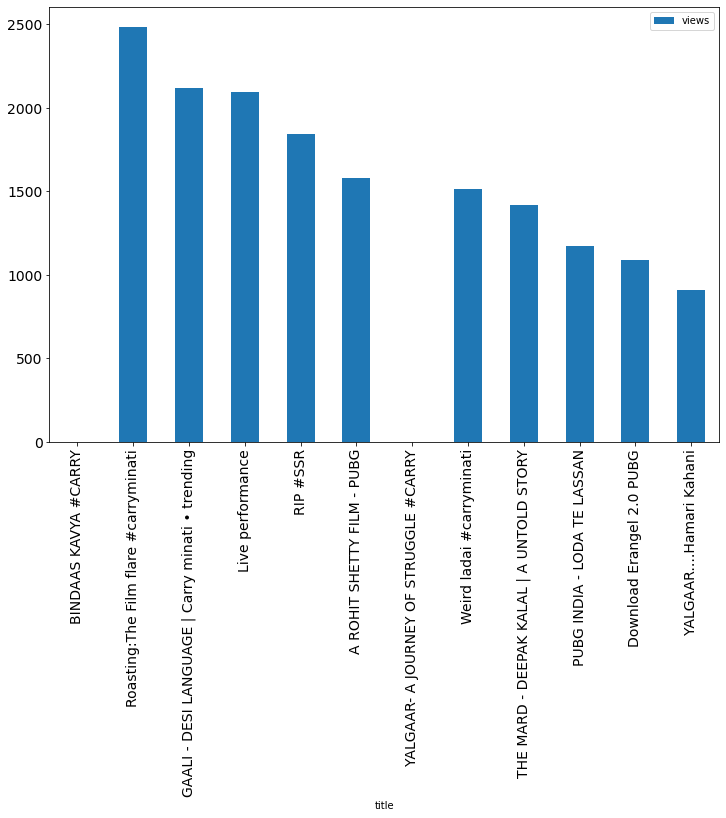

In [40]:
bottom12 = record.tail(12)
bottomHist = bottom12.plot.bar(x="title", y="views", figsize=(12, 8), fontsize=14)